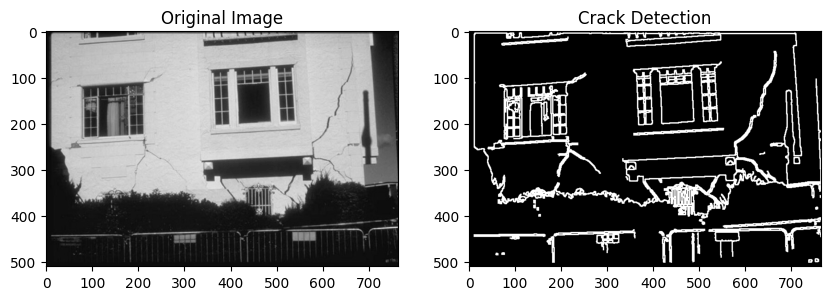

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'craack.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if image is None:
    print(f"Error: Could not load image at {image_path}. Check the file path!")
else:
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5,5), 0)

    # Use Canny Edge Detection
    edges = cv2.Canny(blurred, 50, 150)

    # Apply morphological operations
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=1)

    # Show results using Matplotlib
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1,2,2), plt.imshow(dilated, cmap='gray'), plt.title('Crack Detection')
    plt.show()


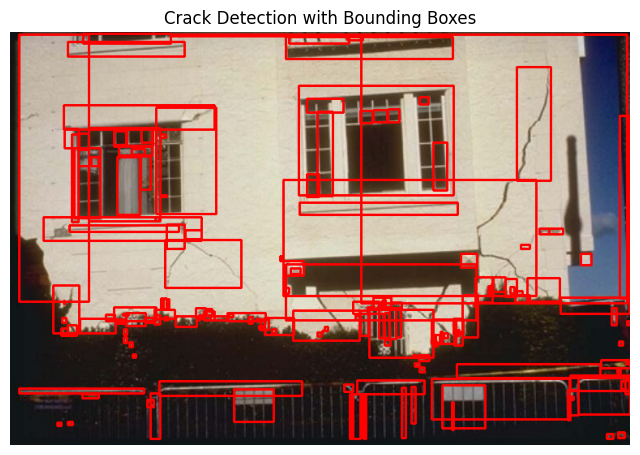

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'craack.jpg'  # Make sure the file exists
image = cv2.imread(image_path)

# Check if image is loaded
if image is None:
    print(f"Error: Could not load image at {image_path}. Check the file path!")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    # Use Canny Edge Detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around detected cracks
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red box (BGR: (0,0,255))

    # Convert BGR to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show result
    plt.figure(figsize=(8,6))
    plt.imshow(image_rgb)
    plt.title("Crack Detection with Bounding Boxes")
    plt.axis("off")
    plt.show()


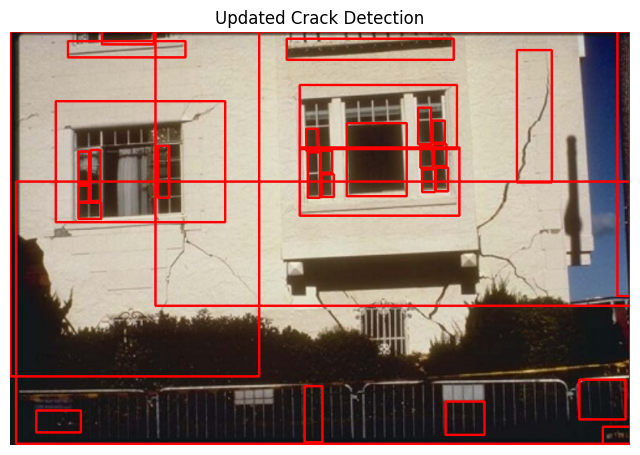

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "craack.jpg"
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not load the image. Check the file path!")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a slightly less aggressive threshold
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                   cv2.THRESH_BINARY_INV, 15, 3)

    # Use a smaller kernel to avoid removing fine cracks
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

    # Find contours again
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Reduce the minimum area threshold to capture more cracks
    min_area = 200  # Lower this value to detect more cracks
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red box

    # Convert to RGB for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show result
    plt.figure(figsize=(8,6))
    plt.imshow(image_rgb)
    plt.title("Updated Crack Detection")
    plt.axis("off")
    plt.show()
